In [2]:
import json
import numpy as np
import rich

In [3]:
with open('taskeval_1757_actual_dialogue.json', 'r') as f:
    actual_dialogue = json.load(f)
    
with open('taskeval_1757_actual_movement.json', 'r') as f:
    actual_movement = json.load(f)
    
with open('taskeval_1757_intent_movement_llama3.json', 'r') as f:
    intent_movement_llama3 = json.load(f)

with open('taskeval_1757_intent_prediction_gpt4.json', 'r') as f:
    intent_movement_gpt4 = json.load(f)

countries_list = ['Austria', 'England', 'France', 'Germany', 'Italy', 'Russia', 'Turkey']

In [3]:
len(actual_dialogue), len(actual_movement)

(1757, 1757)

In [4]:
def get_score_with_env(countries, prediction):
    scores = 0
    for c in countries:
        scores += prediction[c][c.upper()][1]
    score_dict = {}
    score_dict['env'] = prediction['env_uuid']
    score_dict['scores'] = scores / len(countries)
    return score_dict

def get_score_dict_from_dialogue(dialogue):
    score_list = []
    for a in dialogue:
        keys = []
        for vkeys in a.keys():
            if vkeys in countries_list:
                keys.append(vkeys)
        score_list.append(get_score_with_env(keys, a))
    return score_list

In [5]:
actual_dialogue_score_dict = get_score_dict_from_dialogue(actual_dialogue)
actual_movement_score_dict = get_score_dict_from_dialogue(actual_movement)
llama3_movement_score_dict = get_score_dict_from_dialogue(intent_movement_llama3)
gpt4_movement_score_dict = get_score_dict_from_dialogue(intent_movement_gpt4)
actual_dialogue_score_dict[0]

{'env': '01J59BRYNPWT7K0VGH5CNB699B', 'scores': -0.017917531542479992}

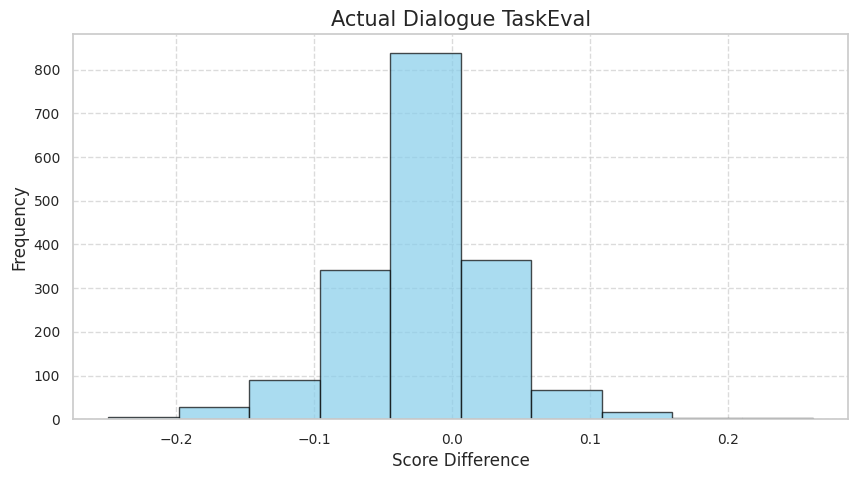

/tmp/ipykernel_3135935/2504797707.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='skyblue', alpha=0.7, linewidth=2)


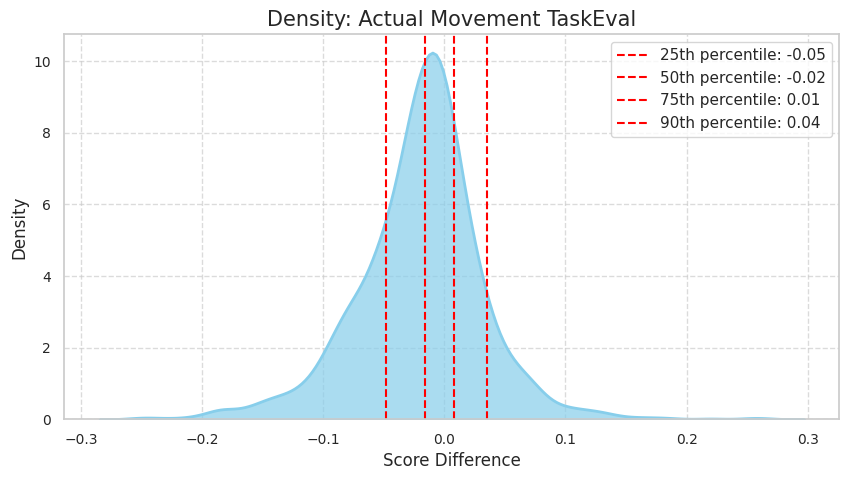

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 示例数据
data = [d['scores'] for d in actual_dialogue_score_dict]

# 设置风格
sns.set(style="whitegrid")

# 直方图
plt.figure(figsize=(10, 5))
plt.hist(data, bins=10, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Actual Dialogue TaskEval', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 密度图
plt.figure(figsize=(10, 5))
sns.kdeplot(data, shade=True, color='skyblue', alpha=0.7, linewidth=2)

# 计算并标记分位点
percentiles = [25, 50, 75, 90]
for percentile in percentiles:
    score = np.percentile(data, percentile)
    plt.axvline(x=score, color='red', linestyle='--', label=f'{percentile}th percentile: {score:.2f}')

plt.title('Density: Actual Dialogue Movement TaskEval', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


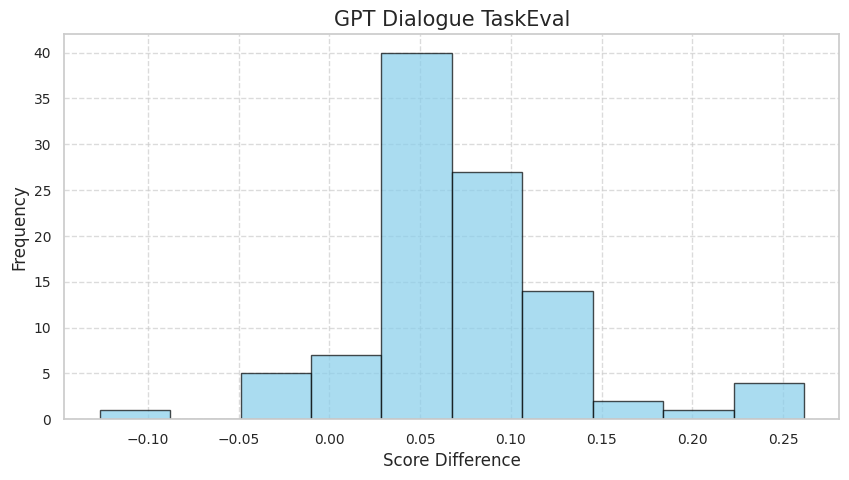

/tmp/ipykernel_666755/1754186166.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='skyblue', alpha=0.7, linewidth=2)


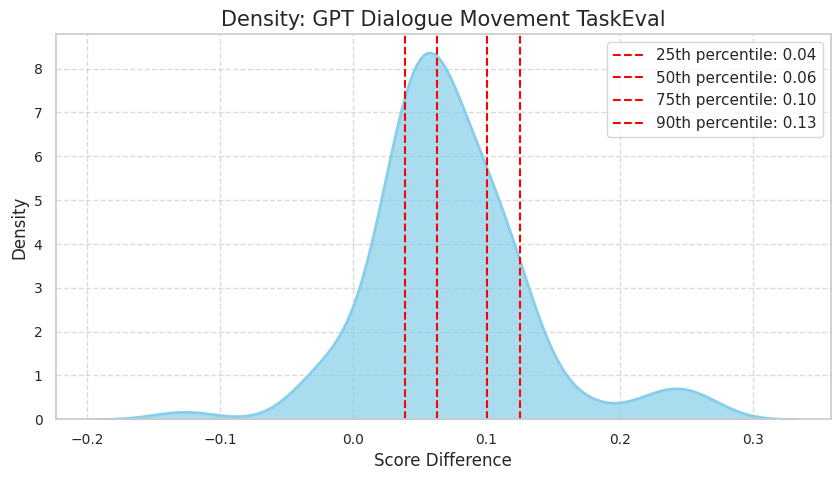

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 示例数据
data = [d['scores'] for d in gpt4_movement_score_dict]

# 设置风格
sns.set(style="whitegrid")

# 直方图
plt.figure(figsize=(10, 5))
plt.hist(data, bins=10, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('GPT Dialogue TaskEval', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 密度图
plt.figure(figsize=(10, 5))
sns.kdeplot(data, shade=True, color='skyblue', alpha=0.7, linewidth=2)

# 计算并标记分位点
percentiles = [25, 50, 75, 90]
for percentile in percentiles:
    score = np.percentile(data, percentile)
    plt.axvline(x=score, color='red', linestyle='--', label=f'{percentile}th percentile: {score:.2f}')

plt.title('Density: GPT Dialogue Movement TaskEval', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


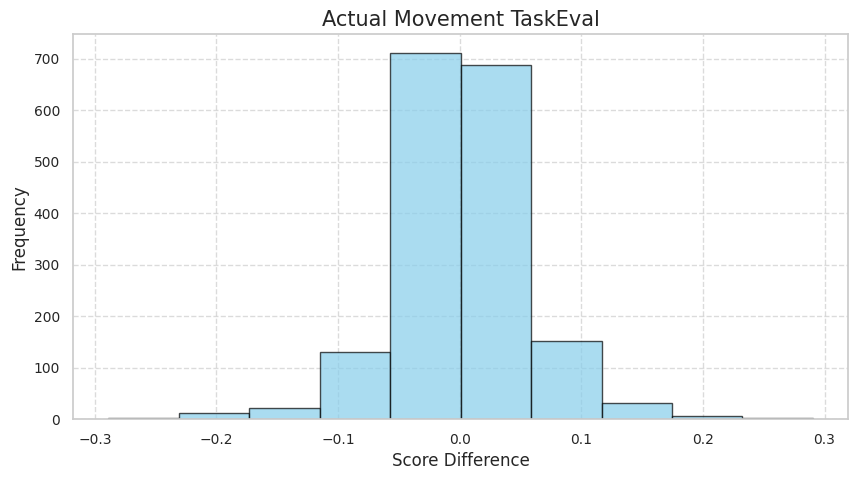

/tmp/ipykernel_3135935/3791240728.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='skyblue', alpha=0.7, linewidth=2)


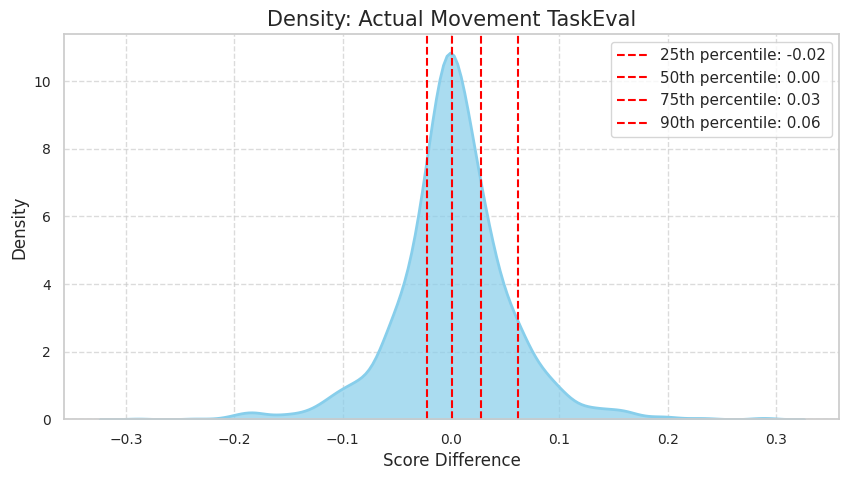

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 示例数据
data = [d['scores'] for d in actual_movement_score_dict]

# 设置风格
sns.set(style="whitegrid")

# 直方图
plt.figure(figsize=(10, 5))
plt.hist(data, bins=10, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Actual Movement TaskEval', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 密度图
plt.figure(figsize=(10, 5))
sns.kdeplot(data, shade=True, color='skyblue', alpha=0.7, linewidth=2)

# 计算并标记分位点
percentiles = [25, 50, 75, 90]
for percentile in percentiles:
    score = np.percentile(data, percentile)
    plt.axvline(x=score, color='red', linestyle='--', label=f'{percentile}th percentile: {score:.2f}')

plt.title('Density: Actual Movement TaskEval', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

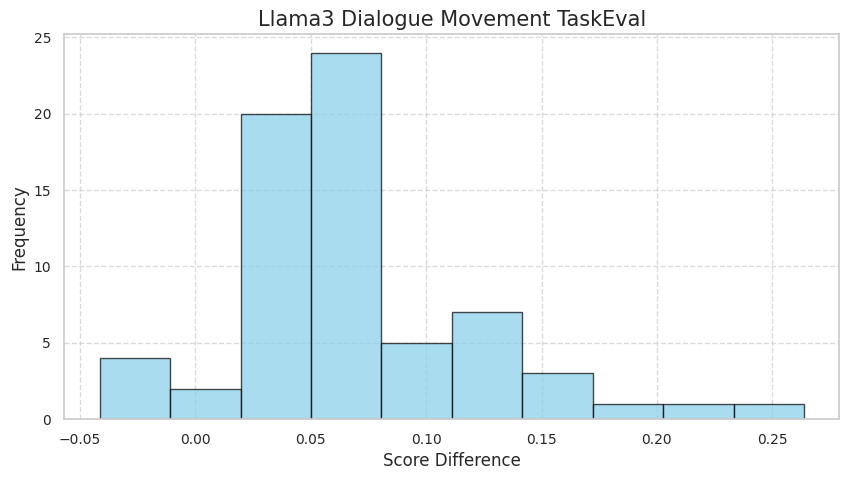

/tmp/ipykernel_3135935/2165538203.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='skyblue', alpha=0.7, linewidth=2)


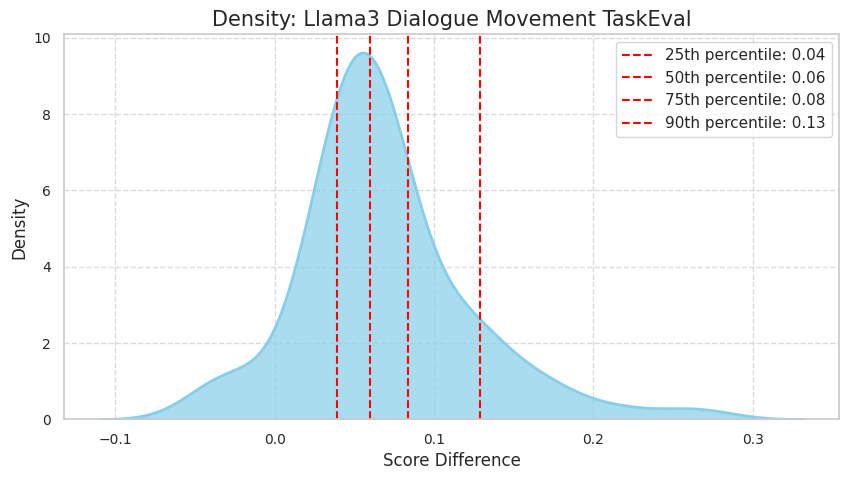

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 示例数据
data = [d['scores'] for d in llama3_movement_score_dict]

# 设置风格
sns.set(style="whitegrid")

# 直方图
plt.figure(figsize=(10, 5))
plt.hist(data, bins=10, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Llama3 Dialogue Movement TaskEval', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 密度图
plt.figure(figsize=(10, 5))
sns.kdeplot(data, shade=True, color='skyblue', alpha=0.7, linewidth=2)

# 计算并标记分位点
percentiles = [25, 50, 75, 90]
for percentile in percentiles:
    score = np.percentile(data, percentile)
    plt.axvline(x=score, color='red', linestyle='--', label=f'{percentile}th percentile: {score:.2f}')

plt.title('Density: Llama3 Dialogue Movement TaskEval', fontsize=15)
plt.xlabel('Score Difference', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [9]:
def list_choice(score_list_1, score_list_2):
    model_score_dict = {item['env']: item['scores'] for item in score_list_2}
    results = []
    for item in score_list_1:
        env = item['env']
        score1 = item['scores']
        score2 = model_score_dict.get(env)
        if score1 >= 0.04 and score2 >= 0.06:
            results.append(env)
    return results


In [10]:
result = list_choice(actual_dialogue_score_dict, actual_movement_score_dict)

In [11]:
len(result)

101

In [12]:
# import random
# random.sample(llama3_movement_score_dict, 2)
for i in llama3_movement_score_dict:
    if i['scores'] >= 0.1:
        print(i)

{'env': '01J59BS0Q1RRDGB3Z3PGHAM5M6', 'scores': 0.11648758500814438}
{'env': '01J59BRYG56V9FXZV022XC7NP5', 'scores': 0.12472871587669943}
{'env': '01J59BS084GNA6C2HKMTR6YZXR', 'scores': 0.1603778600692749}
{'env': '01J59BS0PYNEQ9049PNATE4EYR', 'scores': 0.21409258991479874}
{'env': '01J59BS034QNXGQB2KXAQAXBC3', 'scores': 0.11538928374648094}
{'env': '01J59BRZEZM7F91EWQYG8NPYPX', 'scores': 0.17182965483516455}
{'env': '01J59BS07TKR1T4P92NW3AFRFN', 'scores': 0.12667361553758383}
{'env': '01J59BS0PX2D7RAXBX0ZVGG6MT', 'scores': 0.1448187151690945}
{'env': '01J59BS08QX9VD1GSJ531DJ9TG', 'scores': 0.10065772384405136}
{'env': '01J59BRZJSPX21T0M7AQRSGB70', 'scores': 0.17483297269791365}
{'env': '01J59BRYABDQX0BS9E5CWSRP37', 'scores': 0.12234531715512276}
{'env': '01J59BS07VMSDD4N4FNF76MESC', 'scores': 0.1337199944537133}
{'env': '01J59BS0815G1SAB0KR06RF8BH', 'scores': 0.12352299364283681}
{'env': '01J59BRY7F3BPE7B1JD8SSY4NG', 'scores': 0.2638084627687931}


In [13]:
env_list = ['01J59BS084GNA6C2HKMTR6YZXR', '01J59BRZEZM7F91EWQYG8NPYPX', '01J59BS04EFCX6BGK0C9AQH3WW','01J59BRZMX5H6G94MPRA4XF58T', '01J59BRY4F3Y8BWT31W2P24RHM','01J59BRYJKH6QPCXQSP8FPAME4']
for i in llama3_movement_score_dict:
    if i['env'] in env_list:
        print(i)

{'env': '01J59BS04EFCX6BGK0C9AQH3WW', 'scores': -0.0311471875756979}
{'env': '01J59BS084GNA6C2HKMTR6YZXR', 'scores': 0.1603778600692749}
{'env': '01J59BRZEZM7F91EWQYG8NPYPX', 'scores': 0.17182965483516455}
{'env': '01J59BRY4F3Y8BWT31W2P24RHM', 'scores': 0.07763940654695034}
{'env': '01J59BRZMX5H6G94MPRA4XF58T', 'scores': -0.04151174507569522}
{'env': '01J59BRYJKH6QPCXQSP8FPAME4', 'scores': 0.03860548697412014}


In [14]:
gpt4_movement_score_dict

[{'env': '01J59BRY4F3Y8BWT31W2P24RHM', 'scores': 0.09490234218537807},
 {'env': '01J59BRYJKH6QPCXQSP8FPAME4', 'scores': 0.03860548697412014},
 {'env': '01J59BRZMX5H6G94MPRA4XF58T', 'scores': -0.04003396152984351},
 {'env': '01J59BS084GNA6C2HKMTR6YZXR', 'scores': 0.10608309507369995},
 {'env': '01J59BRZEZM7F91EWQYG8NPYPX', 'scores': 0.22015525307506323},
 {'env': '01J59BS04EFCX6BGK0C9AQH3WW', 'scores': -0.028769112192094326},
 {'env': '01J59BS084GNA6C2HKMTR6YZXR', 'scores': 0.08333529531955719}]

In [15]:
env_list = ['01J59BS084GNA6C2HKMTR6YZXR', '01J59BRZEZM7F91EWQYG8NPYPX', '01J59BS04EFCX6BGK0C9AQH3WW','01J59BRZMX5H6G94MPRA4XF58T', '01J59BRY4F3Y8BWT31W2P24RHM','01J59BRYJKH6QPCXQSP8FPAME4']
for i in actual_dialogue_score_dict:
    if i['env'] in env_list:
        print(i)

{'env': '01J59BS04EFCX6BGK0C9AQH3WW', 'scores': 0.08043783251196146}
{'env': '01J59BRY4F3Y8BWT31W2P24RHM', 'scores': 0.10021558590233326}
{'env': '01J59BRZMX5H6G94MPRA4XF58T', 'scores': 0.06032665737438947}
{'env': '01J59BRYJKH6QPCXQSP8FPAME4', 'scores': 0.06257491372525692}
{'env': '01J59BS084GNA6C2HKMTR6YZXR', 'scores': 0.07403899729251862}
{'env': '01J59BRZEZM7F91EWQYG8NPYPX', 'scores': 0.184791280888021}


In [16]:
for i in intent_movement_llama3:
    if i['env_uuid'] == '01J59BRYJKH6QPCXQSP8FPAME4':
        print(i['intent_dialogue'])

0 AUSTRIA -> ITALY: Hello Italy, nice to play Diplomacy with you! I'm Austria, representing Austria. I'm excited to form alliances and work together to achieve our goals. What's your country, and what are your thoughts on the current board situation?
1 ITALY -> AUSTRIA: Hello Austria, nice to meet you too! I'm Italy, representing Italy. I'm also excited to form alliances and work together. I think the current board situation is quite interesting, with many possibilities. I notice that our countrieshare a border, and I believe we could mutually benefit from cooperating. Perhaps we couldiscuss ways to support each other in gaining supply centers, especially in the Mediterranean region?
2 AUSTRIA -> ITALY: I completely agree with you, Italy. Our shared border does present opportunities for cooperation. I think supporting each other in gaining supply centers in the Mediterranean region could be mutually beneficial. Specifically, I was thinking that if you were to move your army in Venice t

In [17]:
for i in intent_movement_gpt4:
    if i['env_uuid'] == '01J59BS04EFCX6BGK0C9AQH3WW':
        print(i['intent_dialogue'])

0 GERMANY -> ENGLAND: Hello England, I can see we both have a vested interest in maintaining a strong presence in Northern Europe. I've been considering how we might assist each other in securing our positions. If you're open to it, I'd like to propose a collaborative effort this turn. Perhaps we can arrange for some of our units to support each other's movements. For instance, your fleet in the North Sea could help by moving to Norway, which would be mutually beneficial. What do you think?
1 ENGLAND -> GERMANY: Hello Germany, your proposal for collaboration is intriguing. I agree that our fleets could work in tandem to strengthen our hold in Northern Europe. If your fleet in Norway supports a move from my fleet in the North Sea to Norway, it could indeed be beneficial to us both. Additionally, I'd appreciate support from your army in Denmark to assist my army in Edinburgh to move into Norway. This would help solidify our positions against any northern threats. What are your thoughts o

In [18]:
# 打开一个文件进行写入
env_list = ['01J59BS084GNA6C2HKMTR6YZXR', '01J59BRZEZM7F91EWQYG8NPYPX', '01J59BS04EFCX6BGK0C9AQH3WW','01J59BRZMX5H6G94MPRA4XF58T', '01J59BRY4F3Y8BWT31W2P24RHM','01J59BRYJKH6QPCXQSP8FPAME4']
with open('output.txt', 'w', encoding='utf-8') as file:
    for i in intent_movement_gpt4:
        if i['env_uuid'] in env_list:
            file.write(i['env_uuid'] + '\n' + i['intent_dialogue'] + '\n')  # 写入对话并添加换行符

# 这将创建一个名为 output.txt 的文件，并将符合条件的对话写入文件，每条对话后都有一个换行符


In [19]:
for i in intent_movement_llama3:
    if i['env_uuid'] == '01J59BRZEZM7F91EWQYG8NPYPX':
        print(i['intent_dialogue'])

0 AUSTRIA -> RUSSIA: Hello Russia, it's greato be playing Diplomacy with you. I'm Austria, playing as Austria. I think it's essential to have a strong alliance in thearly game. Would you like to discuss a potential partnership and howe can work together to achieve our goals?
1 RUSSIA -> AUSTRIA: Hello Austria, I'm Russia, playing as Russia. I appreciate your willingness to form an alliance. Indeed, a strong partnership can be crucial in thearly game. I'm interested in discussing howe can work together. Specifically, I think our armies can complement each other well. Perhaps we can coordinate our moves to take down a weaker power, like Turkey? What are your thoughts on this?
2 AUSTRIA -> RUSSIA: I think that's a great idea, Russia. Taking down Turkey would give us both a significant advantage in thearly game. I was thinking of moving my army in Bulgaria to support your move into Turkey. Additionally, I could move my fleet in Greece to support your naval movement into the Black Sea. What

In [20]:
for i in actual_movement:
    if i['env_uuid'] == '01J59BRZMX5H6G94MPRA4XF58T':
        print(i['intent_dialogue'])

0 AUSTRIA -> ITALY: Whoo, let's get this turn going. Not to nag, but make sure to get that support hold order in. Anything yo need me to do this turn?
1 ITALY -> AUSTRIA: Sure on support order, umm whats to be done about Bulgaria and Turkey? Am I still meant to be attacking him?
2 AUSTRIA -> ITALY: If you could bounce me at Bulgaria this turn, that would be great. You can lay into Turkey 100% next turn. Sound good?
3 ITALY -> AUSTRIA: Lol, Aye that sounds fine, you dont want Bulgaria though, just the bounce?
4 AUSTRIA -> ITALY: Yeah; I want to ensure Turkey has enough firepower to get into the Black Sea and Sevastopol, and also want to ensure that Russia doesn't get Rumania, more importantly.
After the year after this one, you should look at expanding Westwards, while I mop up Russia.
5 ITALY -> AUSTRIA: Ok, that sounds fair

